In [2]:
pip uninstall aerosandbox -y

Found existing installation: AeroSandbox 4.2.8
Uninstalling AeroSandbox-4.2.8:
  Successfully uninstalled AeroSandbox-4.2.8
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -e .[full]

Obtaining file:///C:/Users/Thomas/Documents/GitHub/AeroSandbox
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py develop for AeroSandbox
Note: you may need to restart the kernel to use updated packages.


In [4]:
import aerosandbox as asb
print(asb.__file__)

C:\Users\Thomas\Documents\GitHub\AeroSandbox\aerosandbox\__init__.py


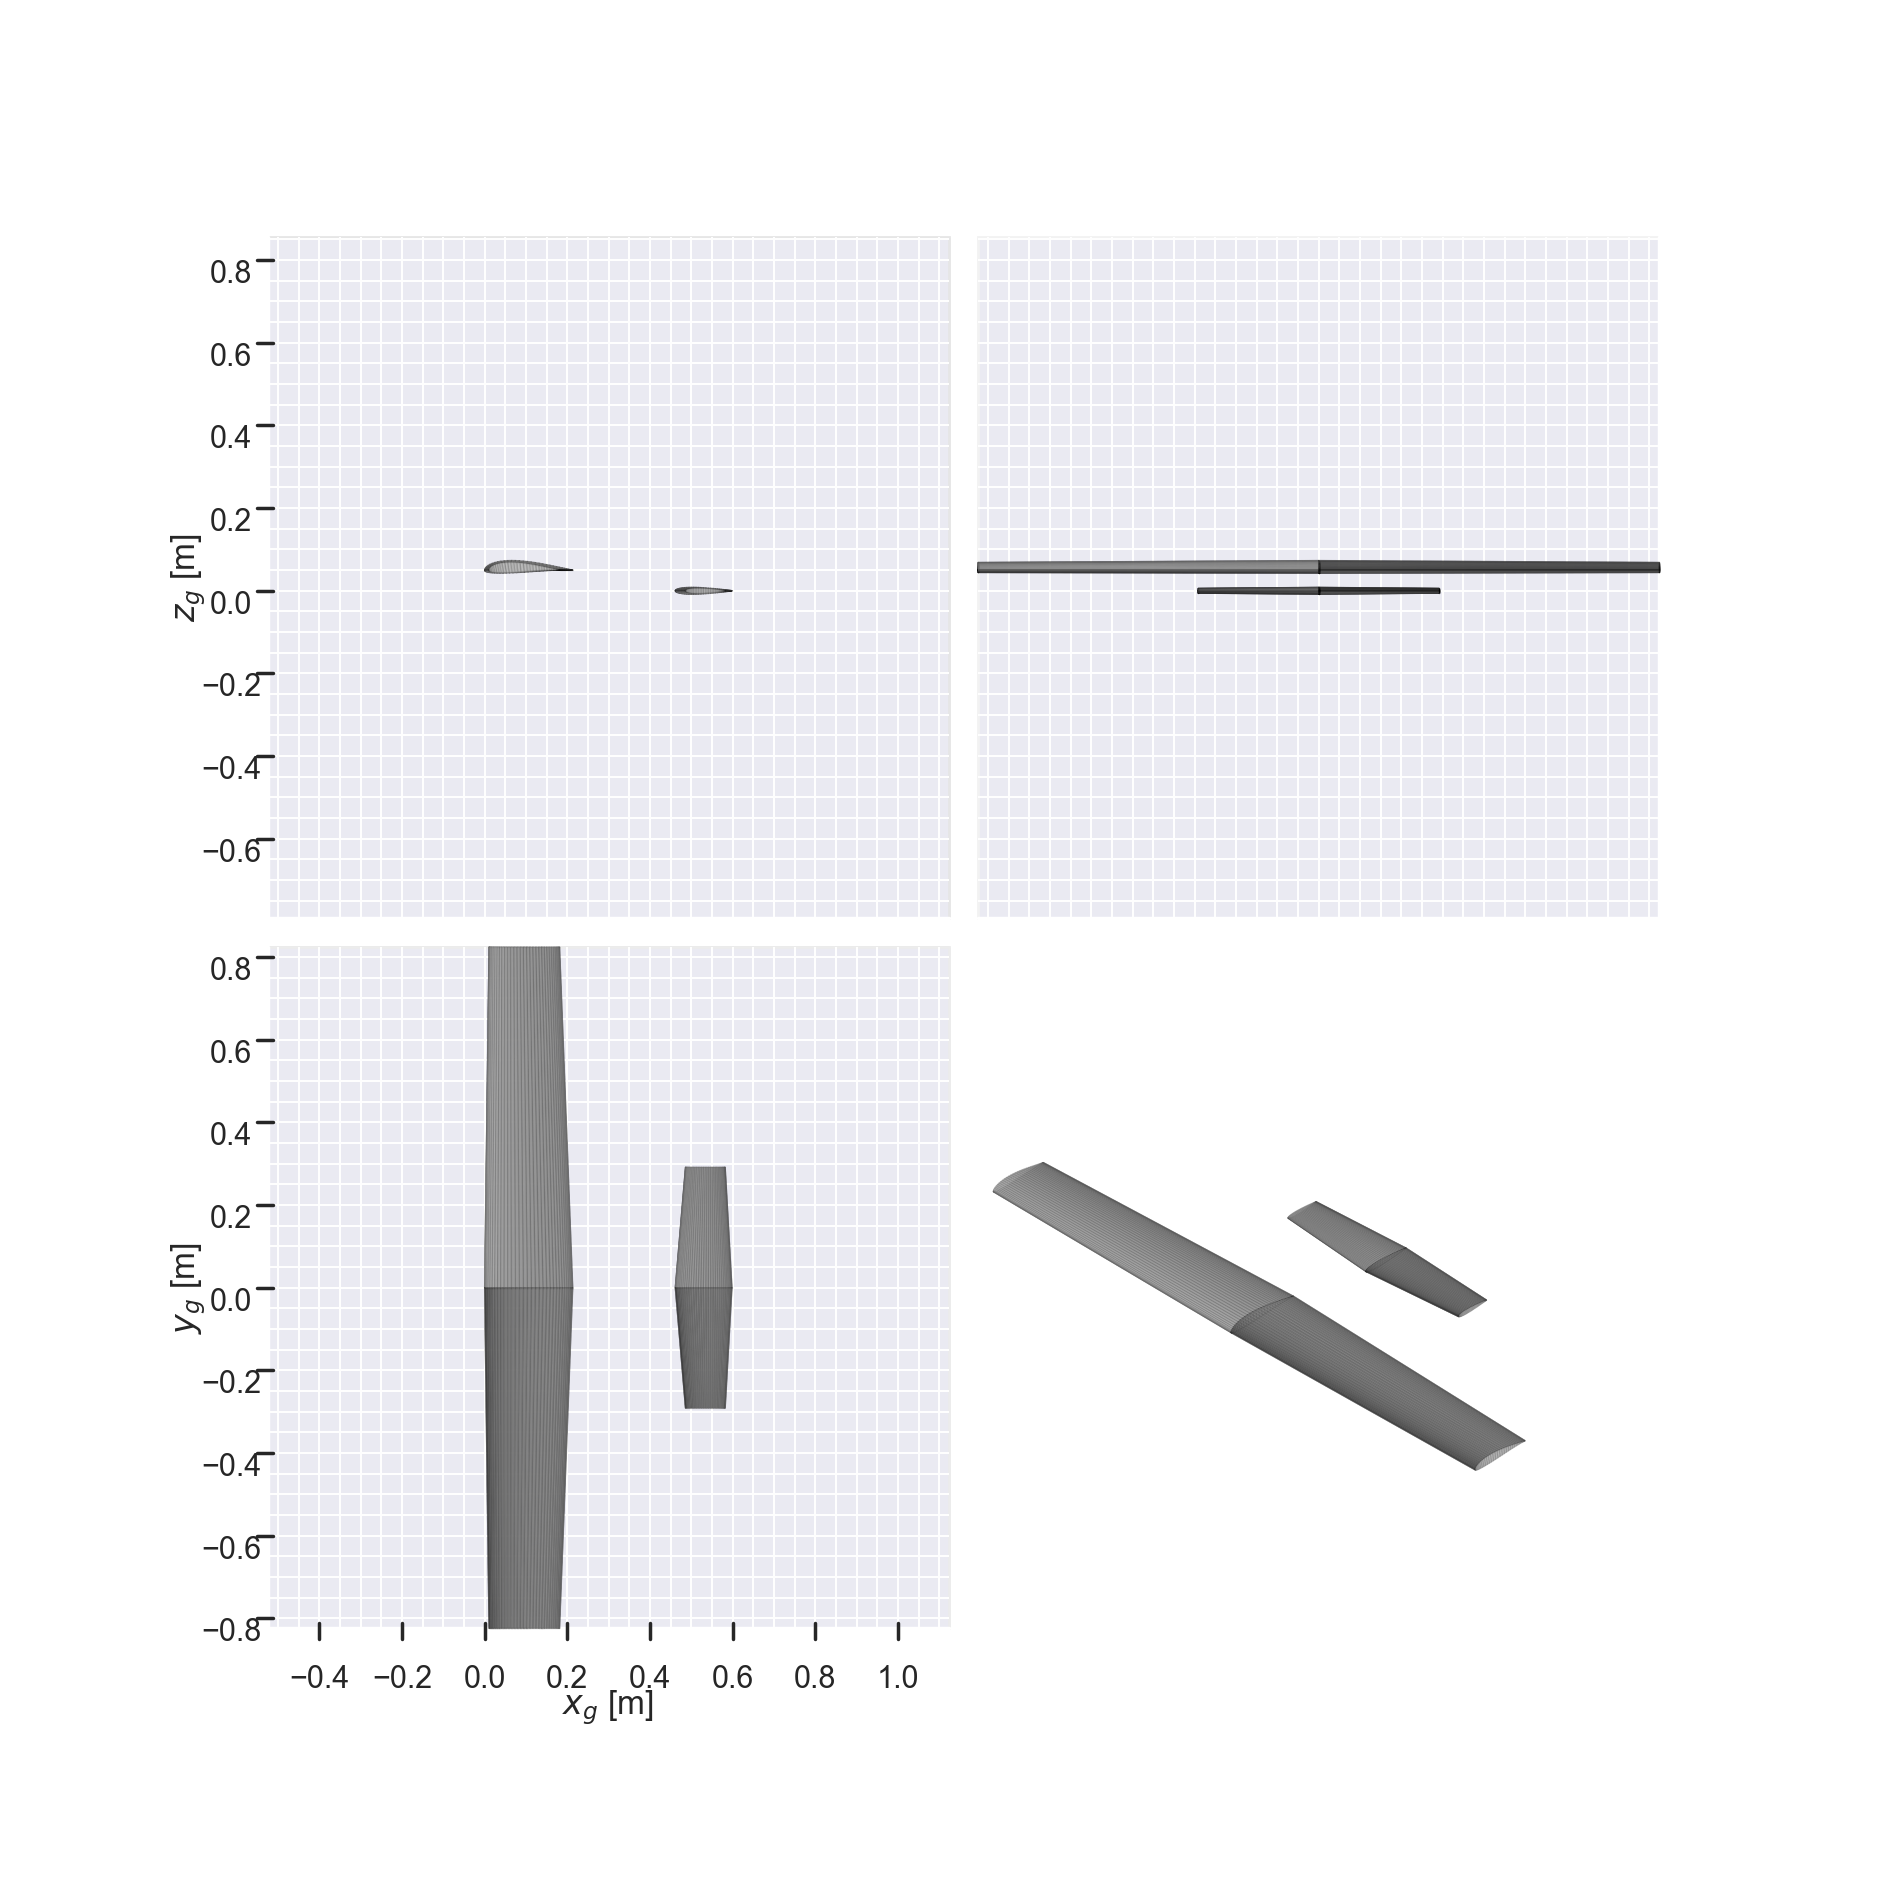

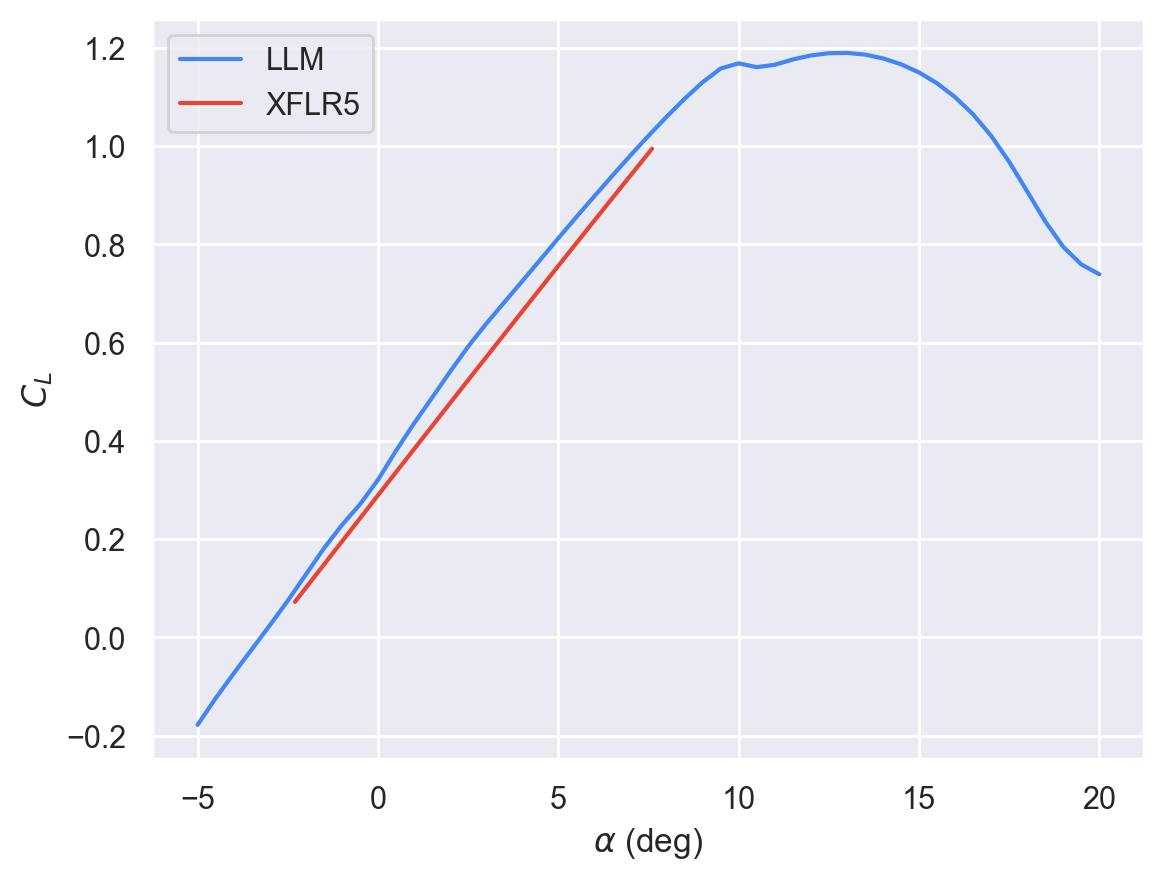

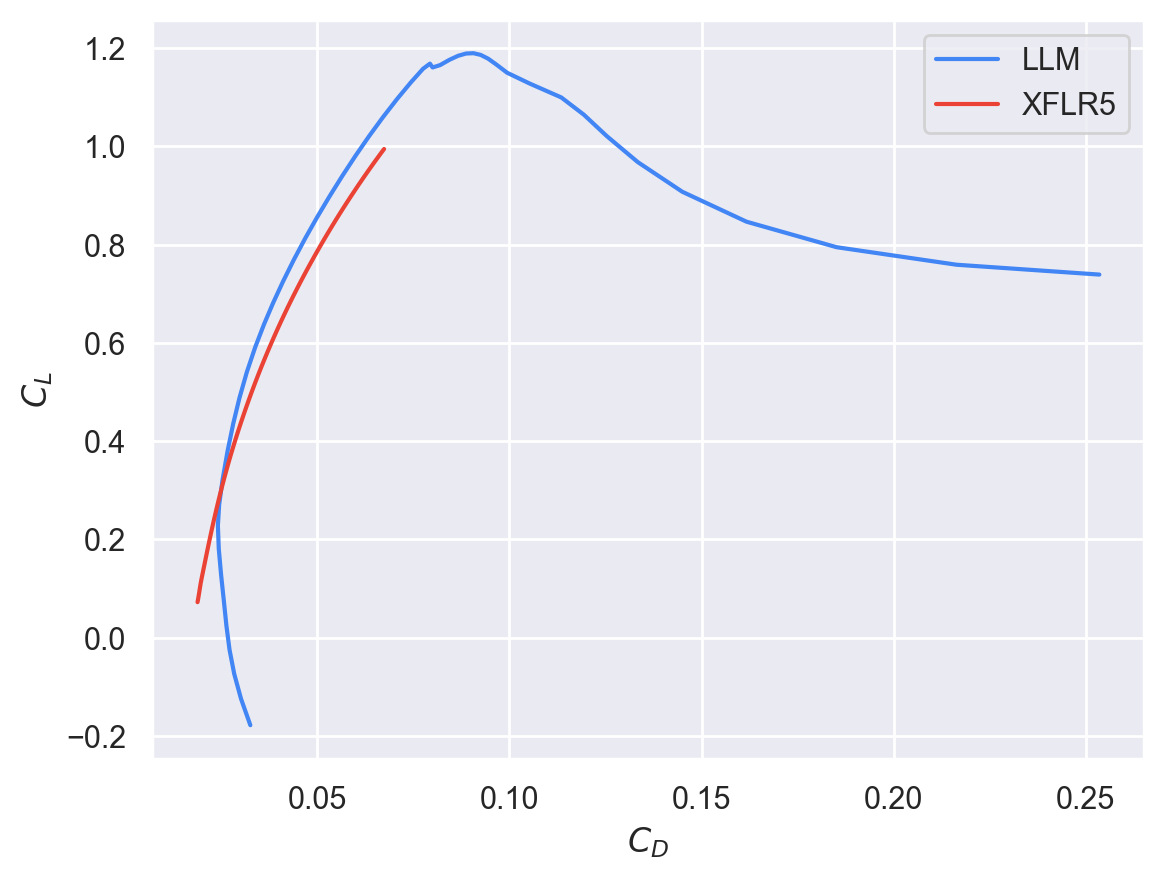

In [4]:
import aerosandbox as asb
import aerosandbox.numpy as np
import matplotlib.pyplot as plt

AF_wing_root = asb.Airfoil("sd7062")

AF_wing_tip = asb.Airfoil("sd7062")
AF_tail = asb.Airfoil("naca0012")

airplane = asb.Airplane(
    name="Airplane",
    xyz_ref=[0.06151680156, 0, 0],
    wings=[
        asb.Wing(
            name="Main Wing",
            symmetric=True,
            xsecs=[
                asb.WingXSec(
                    xyz_le=[0, 0, 0.05],
                    chord=0.2132307837,
                    airfoil=AF_wing_root,
                ),
                asb.WingXSec(
                    xyz_le=[0.25*(0.2132307837 - 0.170780567), 1.648457843/2, 0.05],
                    chord=0.170780567,
                    airfoil=AF_wing_tip,
                    twist=0,
                ),
            ],
        ),
        asb.Wing(
            name="Tail",
            symmetric=True,
            xsecs=[
                asb.WingXSec(
                    xyz_le=[0, 0, 0],
                    chord=0.1371371835,
                    airfoil=AF_tail,
                ),
                asb.WingXSec(
                    xyz_le=[(1 - 0.4) * (0.1371371835 - 0.09599602843), 0.5828330298 / 2, 0],
                    chord=0.09599602843,
                    airfoil=AF_tail,
                ),
            ],
        ).translate([0.4613265844, 0, 0]),
    ],
)

airplane.draw_three_view()

alpha = np.linspace(-5, 20, 51)
CL_list = []
CD_list = []

for a in alpha:
    llm = asb.LiftingLine(
        airplane=airplane,
        op_point=asb.OperatingPoint(
            velocity=8.328832493,
            alpha=a,
        ),
        spanwise_resolution=16,
        align_trailing_vortices_with_wind=False,
        n_crit=9,
        xtr_lower=1,
    )
    res = llm.run()
    CL_list.append(res["CL"])
    CD_list.append(res["CD"])

CL = np.array(CL_list)
CD = np.array(CD_list)

alpha_xflr5 = np.array([
-2.3, -2.2, -2.1, -2, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1, -0.9, -0.8,
-0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,
1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9,
3, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
5, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
7, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6
])

CL_xflr5 = np.array([
0.0722, 0.081628, 0.091057, 0.100485, 0.109913, 0.11934, 0.128767, 0.138193, 0.147619,
0.157044, 0.166469, 0.175893, 0.185315, 0.194737, 0.204159, 0.213579, 0.222997, 0.232415,
0.241832, 0.251247, 0.260661, 0.270073, 0.279485, 0.288894, 0.298302, 0.307708, 0.317113,
0.326515, 0.335916, 0.345315, 0.354712, 0.364107, 0.373499, 0.38289, 0.392278, 0.401664,
0.411048, 0.420429, 0.429807, 0.439183, 0.448557, 0.457928, 0.467296, 0.476661, 0.486023,
0.495382, 0.504739, 0.514092, 0.523442, 0.532789, 0.542132, 0.551472, 0.560809, 0.570143,
0.579472, 0.588799, 0.598121, 0.60744, 0.616755, 0.626067, 0.635374, 0.644677, 0.653977,
0.663272, 0.672563, 0.68185, 0.691133, 0.700411, 0.709685, 0.718954, 0.728219, 0.73748,
0.746735, 0.755986, 0.765232, 0.774474, 0.78371, 0.792942, 0.802168, 0.81139, 0.820606,
0.829817, 0.839023, 0.848223, 0.857418, 0.866608, 0.875792, 0.88497, 0.894143, 0.90331,
0.912472, 0.921627, 0.930777, 0.939921, 0.949059, 0.958191, 0.967316, 0.976436, 0.985549,
0.994656
])

CD_xflr5 = np.array([
0.018833, 0.019052, 0.019252, 0.019438, 0.019634, 0.019863, 0.020107, 0.020353, 0.0206,
0.020846, 0.021092, 0.021339, 0.021591, 0.021846, 0.022103, 0.022363, 0.022627, 0.022894,
0.023166, 0.023443, 0.023724, 0.024011, 0.024303, 0.0246, 0.024903, 0.025212, 0.025527,
0.025847, 0.026174, 0.026506, 0.026845, 0.02719, 0.027542, 0.027901, 0.028266, 0.028639,
0.029018, 0.029404, 0.029796, 0.030194, 0.030598, 0.031008, 0.031424, 0.031846, 0.032274,
0.032709, 0.033151, 0.033599, 0.034055, 0.034517, 0.034986, 0.035463, 0.035947, 0.036438,
0.036935, 0.037441, 0.037953, 0.038473, 0.039, 0.039534, 0.040076, 0.040625, 0.041182,
0.041746, 0.042318, 0.042898, 0.043485, 0.04408, 0.044683, 0.045293, 0.045912, 0.046539,
0.047173, 0.047816, 0.048466, 0.049124, 0.04979, 0.050463, 0.051144, 0.051834, 0.05253,
0.053235, 0.053948, 0.054669, 0.055398, 0.056136, 0.056881, 0.057635, 0.058398, 0.059169,
0.059949, 0.060737, 0.061535, 0.062341, 0.063157, 0.063982, 0.064816, 0.065661, 0.066515,
0.06738
])

plt.figure()
plt.plot(alpha, CL, label="LLM")
plt.plot(alpha_xflr5, CL_xflr5, label="XFLR5")
plt.xlabel(r"$\alpha$ (deg)")
plt.ylabel(r"$C_L$")
plt.legend()
plt.show()

plt.figure()
plt.plot(CD, CL, label="LLM")
plt.plot(CD_xflr5, CL_xflr5, label="XFLR5")
plt.xlabel(r"$C_D$")
plt.ylabel(r"$C_L$")
plt.legend()
plt.show()

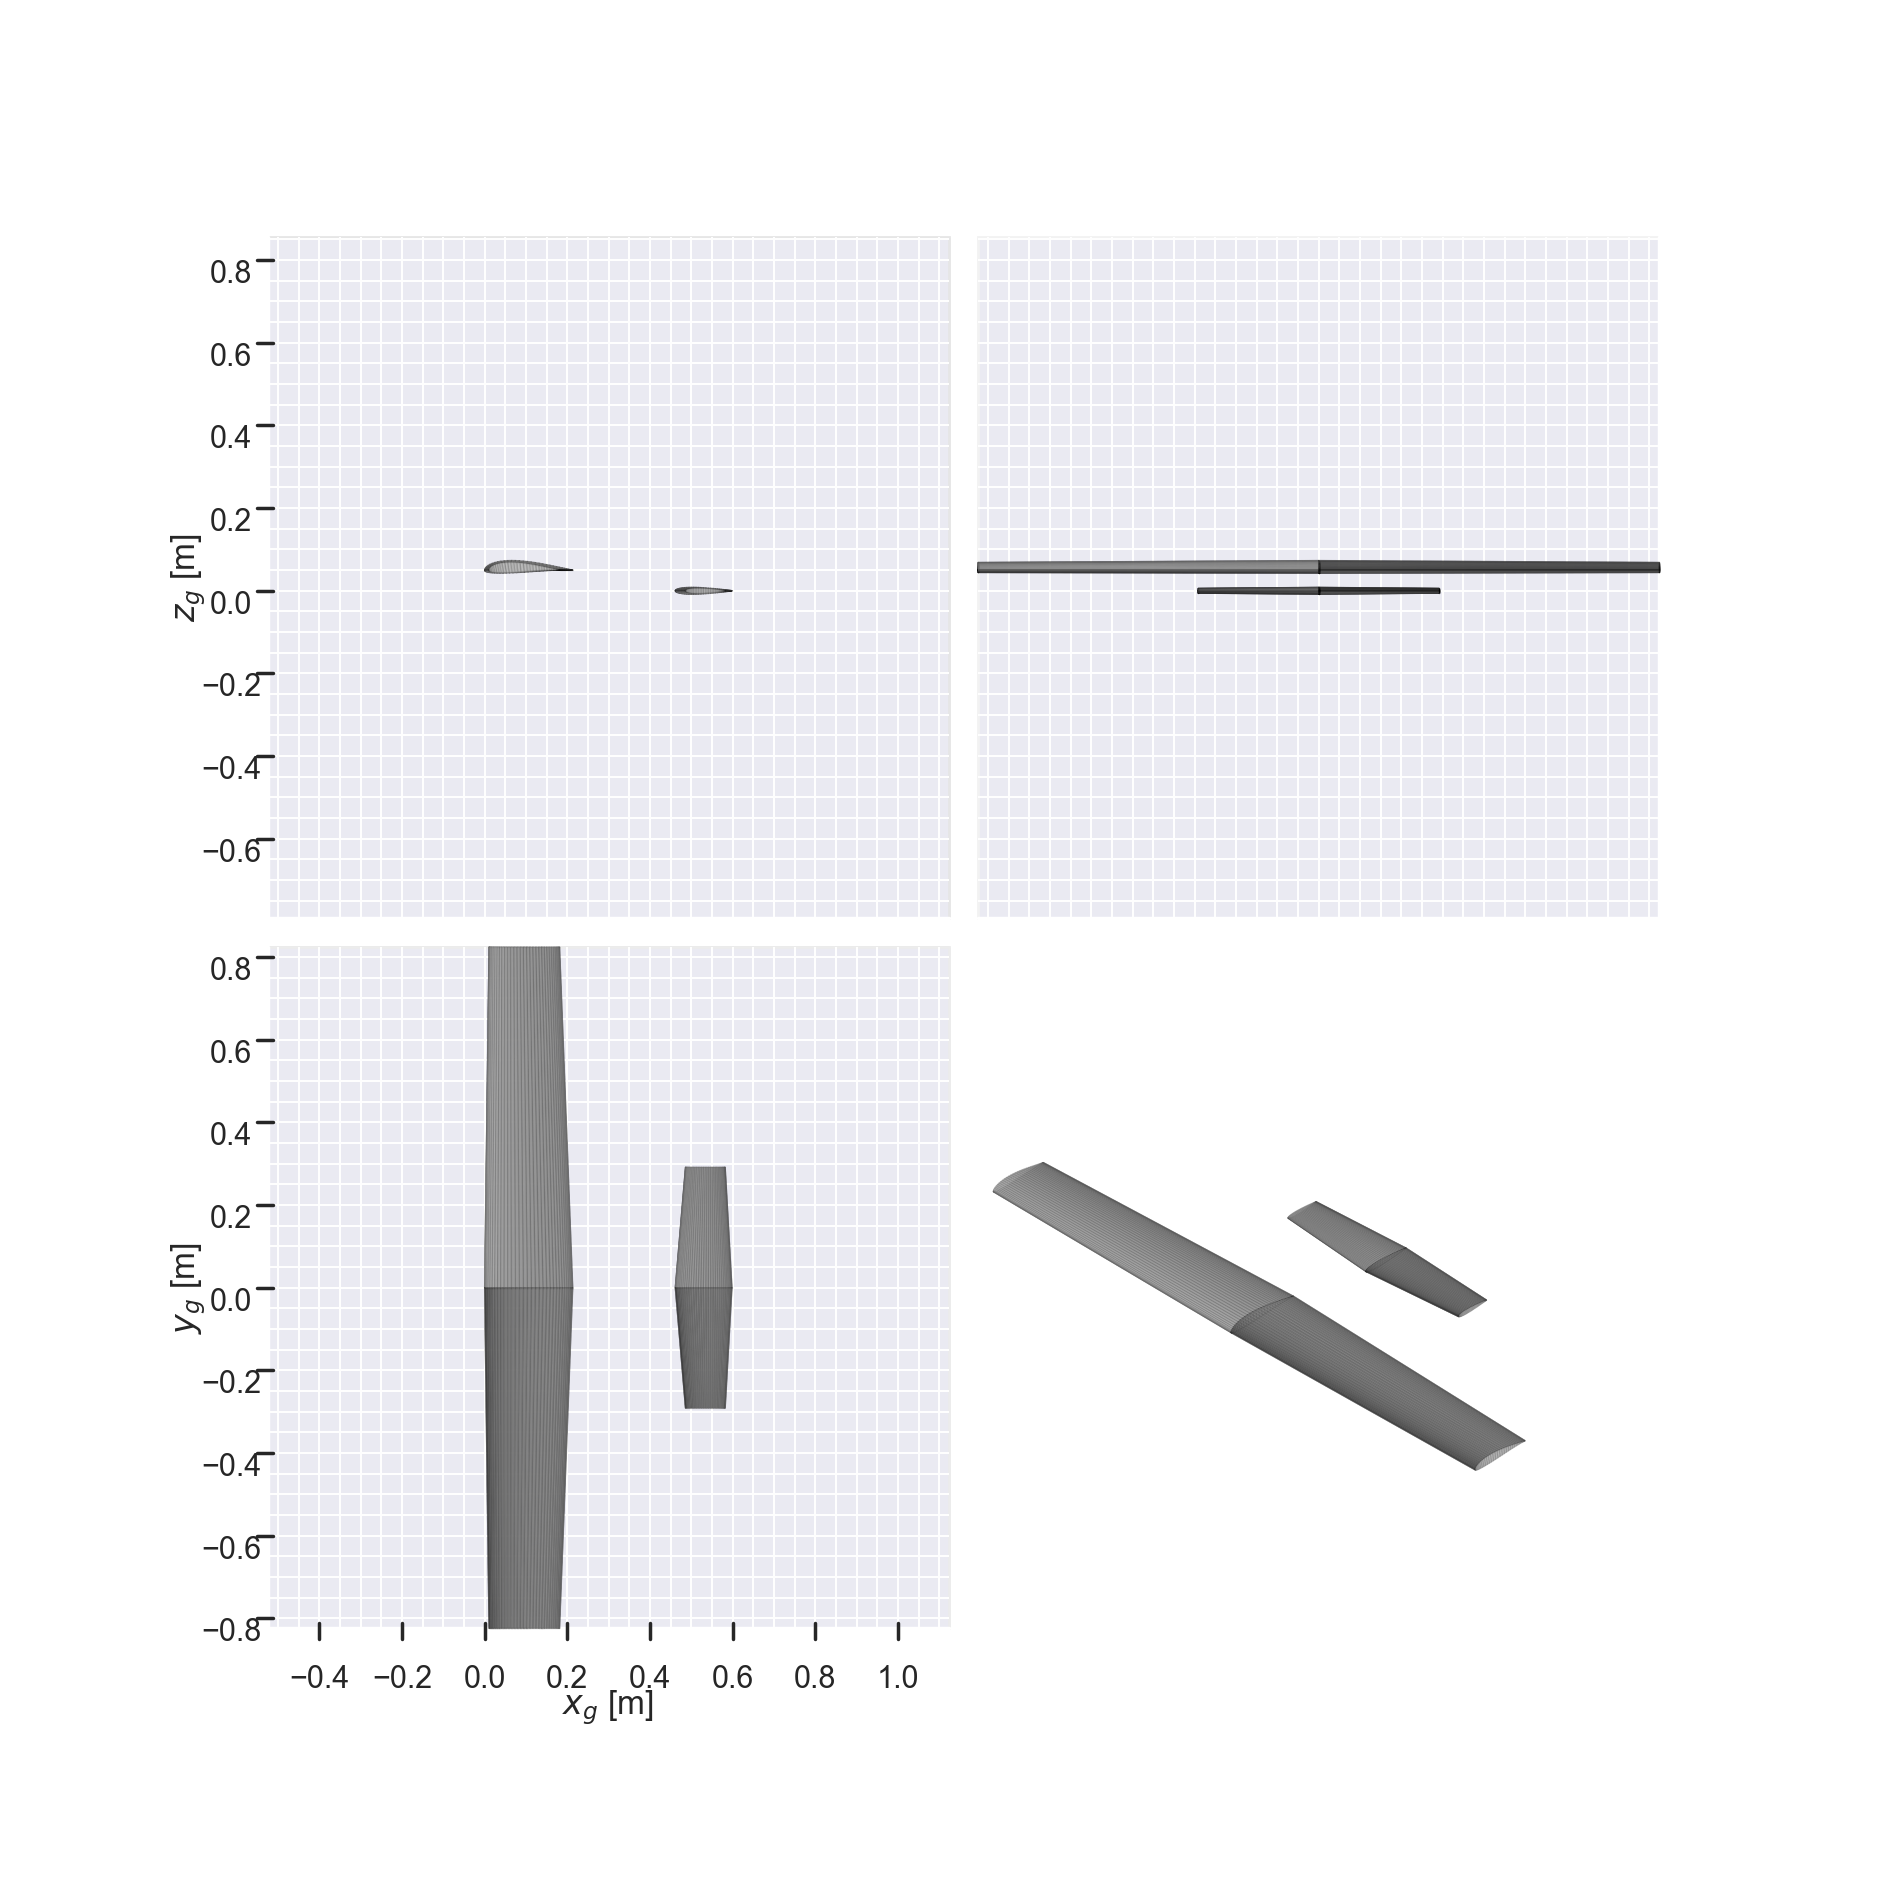

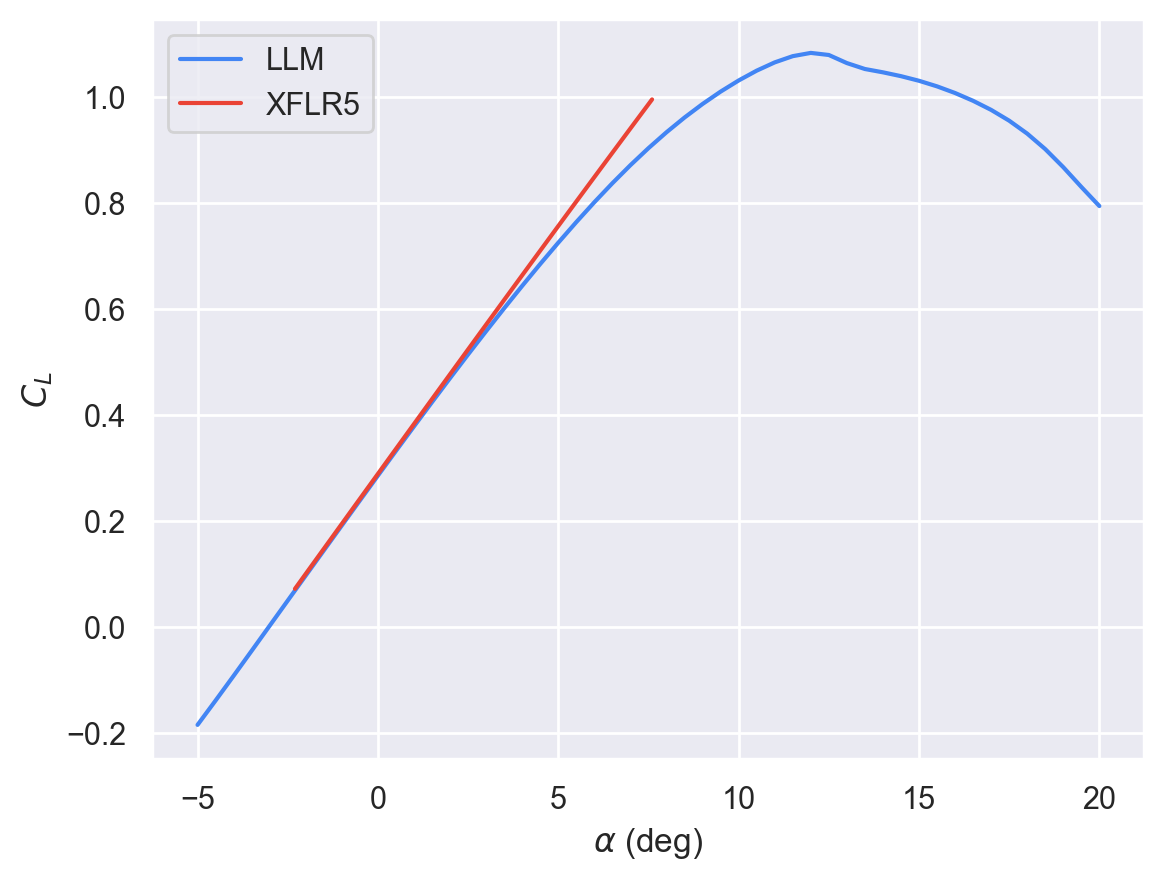

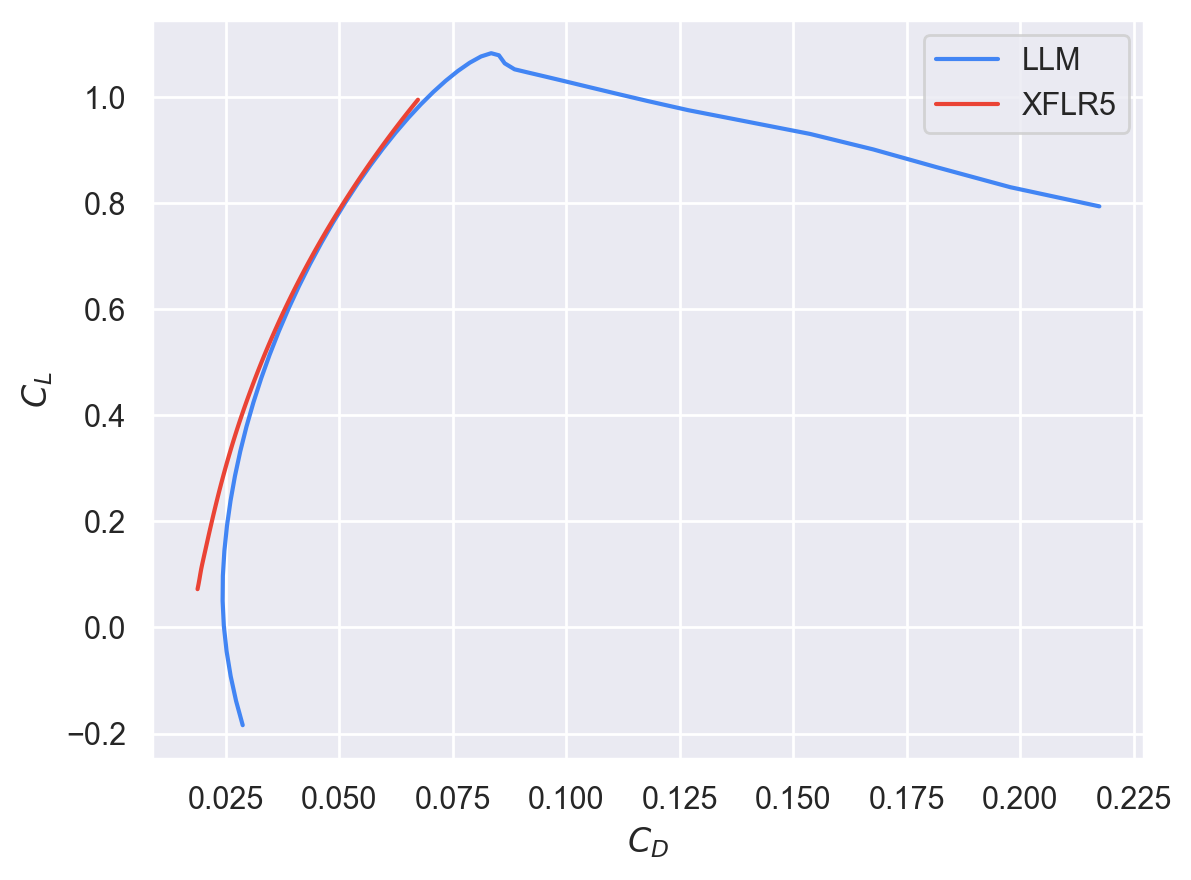

In [3]:
import aerosandbox as asb
import aerosandbox.numpy as np
import matplotlib.pyplot as plt

AF_wing_root = asb.Airfoil("sd7062")

AF_wing_tip = asb.Airfoil("sd7062")
AF_tail = asb.Airfoil("naca0012")

airplane = asb.Airplane(
    name="Airplane",
    xyz_ref=[0.06151680156, 0, 0],
    wings=[
        asb.Wing(
            name="Main Wing",
            symmetric=True,
            xsecs=[
                asb.WingXSec(
                    xyz_le=[0, 0, 0.05],
                    chord=0.2132307837,
                    airfoil=AF_wing_root,
                ),
                asb.WingXSec(
                    xyz_le=[0.25*(0.2132307837 - 0.170780567), 1.648457843/2, 0.05],
                    chord=0.170780567,
                    airfoil=AF_wing_tip,
                    twist=0,
                ),
            ],
        ),
        asb.Wing(
            name="Tail",
            symmetric=True,
            xsecs=[
                asb.WingXSec(
                    xyz_le=[0, 0, 0],
                    chord=0.1371371835,
                    airfoil=AF_tail,
                ),
                asb.WingXSec(
                    xyz_le=[(1 - 0.4) * (0.1371371835 - 0.09599602843), 0.5828330298 / 2, 0],
                    chord=0.09599602843,
                    airfoil=AF_tail,
                ),
            ],
        ).translate([0.4613265844, 0, 0]),
    ],
)

airplane.draw_three_view()

alpha = np.linspace(-5, 20, 51)
CL_list = []
CD_list = []

for a in alpha:
    llm = asb.LiftingLine(
        airplane=airplane,
        op_point=asb.OperatingPoint(
            velocity=8.328832493,
            alpha=a,
        ),
        spanwise_resolution=16,
        align_trailing_vortices_with_wind=False,
        n_crit=5,
        xtr_lower=0.1,
        xtr_upper=0.1,
    )
    res = llm.run()
    CL_list.append(res["CL"])
    CD_list.append(res["CD"])

CL = np.array(CL_list)
CD = np.array(CD_list)

alpha_xflr5 = np.array([
-2.3, -2.2, -2.1, -2, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1, -0.9, -0.8,
-0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1,
1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9,
3, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
5, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
7, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6
])

CL_xflr5 = np.array([
0.0722, 0.081628, 0.091057, 0.100485, 0.109913, 0.11934, 0.128767, 0.138193, 0.147619,
0.157044, 0.166469, 0.175893, 0.185315, 0.194737, 0.204159, 0.213579, 0.222997, 0.232415,
0.241832, 0.251247, 0.260661, 0.270073, 0.279485, 0.288894, 0.298302, 0.307708, 0.317113,
0.326515, 0.335916, 0.345315, 0.354712, 0.364107, 0.373499, 0.38289, 0.392278, 0.401664,
0.411048, 0.420429, 0.429807, 0.439183, 0.448557, 0.457928, 0.467296, 0.476661, 0.486023,
0.495382, 0.504739, 0.514092, 0.523442, 0.532789, 0.542132, 0.551472, 0.560809, 0.570143,
0.579472, 0.588799, 0.598121, 0.60744, 0.616755, 0.626067, 0.635374, 0.644677, 0.653977,
0.663272, 0.672563, 0.68185, 0.691133, 0.700411, 0.709685, 0.718954, 0.728219, 0.73748,
0.746735, 0.755986, 0.765232, 0.774474, 0.78371, 0.792942, 0.802168, 0.81139, 0.820606,
0.829817, 0.839023, 0.848223, 0.857418, 0.866608, 0.875792, 0.88497, 0.894143, 0.90331,
0.912472, 0.921627, 0.930777, 0.939921, 0.949059, 0.958191, 0.967316, 0.976436, 0.985549,
0.994656
])

CD_xflr5 = np.array([
0.018833, 0.019052, 0.019252, 0.019438, 0.019634, 0.019863, 0.020107, 0.020353, 0.0206,
0.020846, 0.021092, 0.021339, 0.021591, 0.021846, 0.022103, 0.022363, 0.022627, 0.022894,
0.023166, 0.023443, 0.023724, 0.024011, 0.024303, 0.0246, 0.024903, 0.025212, 0.025527,
0.025847, 0.026174, 0.026506, 0.026845, 0.02719, 0.027542, 0.027901, 0.028266, 0.028639,
0.029018, 0.029404, 0.029796, 0.030194, 0.030598, 0.031008, 0.031424, 0.031846, 0.032274,
0.032709, 0.033151, 0.033599, 0.034055, 0.034517, 0.034986, 0.035463, 0.035947, 0.036438,
0.036935, 0.037441, 0.037953, 0.038473, 0.039, 0.039534, 0.040076, 0.040625, 0.041182,
0.041746, 0.042318, 0.042898, 0.043485, 0.04408, 0.044683, 0.045293, 0.045912, 0.046539,
0.047173, 0.047816, 0.048466, 0.049124, 0.04979, 0.050463, 0.051144, 0.051834, 0.05253,
0.053235, 0.053948, 0.054669, 0.055398, 0.056136, 0.056881, 0.057635, 0.058398, 0.059169,
0.059949, 0.060737, 0.061535, 0.062341, 0.063157, 0.063982, 0.064816, 0.065661, 0.066515,
0.06738
])

plt.figure()
plt.plot(alpha, CL, label="LLM")
plt.plot(alpha_xflr5, CL_xflr5, label="XFLR5")
plt.xlabel(r"$\alpha$ (deg)")
plt.ylabel(r"$C_L$")
plt.legend()
plt.show()

plt.figure()
plt.plot(CD, CL, label="LLM")
plt.plot(CD_xflr5, CL_xflr5, label="XFLR5")
plt.xlabel(r"$C_D$")
plt.ylabel(r"$C_L$")
plt.legend()
plt.show()